# Entanglement swap

The easiest way to create entanglement between two qubits is to bring them in direct contact.  The interaction potential makes them entangled.  Is it possible to make two qubits separated by a great distance without any interaction?  It turns out possible with help of two entangled pairs as resource.  The protocol is known as [*quantum entanglement swap*](https://en.wikipedia.org/wiki/Quantum_teleportation#Entanglement_swapping).  The mechanism is similar to the quantum teleportation.

## The protocol

Suppose that Alice and Charlie share an entangled pair of qubits, $q_A$ with Alice and $q_{C_A}$ with Charlies.  Similarly, Bob and  Charlie share an entangled pair of qubits, $q_B$ with Bob and $q_{C_B}$ with Charlie.   Charlie's qubits, $q_{C_A}$ and $q_{C_B}$, are not entangled.  Now, Charlie apply Bell measurement (See {numref}`ssec-bell-measurement`)  on his qubits.  Then, 

For convenience, we map the qubits as $q_A \rightarrow q_0$, $q_{C_A} \rightarrow q_1$, $q_{C_B} \rightarrow q_2$, and $q_{B} \rightarrow q_3$. As usual, we express the computational basis as $|q_3\,q_2\,q_1\,q_0\rangle$.  Our goal is to entangle $q_0$ and $q_3$.

Let us assume that $q_0$ and $q_1$ are in  Bell state $|\Phi^{+}\rangle_{01}$ and similarly, $q_2$ and $q_3$ are in  Bell state $|\Phi^{+}\rangle_{23}$.  Hence, the initial state of the total system is 

$$
\begin{align}
|\psi_0\rangle &= |\Phi^{+}\rangle_{01} \otimes |\Phi^{+}\rangle_{23} \\
&=\frac{1}{2} \left (|0000\rangle + |0011\rangle + |1100\rangle + |1111\rangle\right) \\
&=\frac{1}{2} \left (|00\rangle_{03} \otimes^\prime |00\rangle_{12} + |01\rangle_{03} \otimes^\prime |01\rangle_{12} +
(|10\rangle_{03} \otimes^\prime |10\rangle_{12} + |11\rangle_{03} \otimes^\prime |11\rangle_{12} \right)
\end{align}
$$(psi0-ABC)

where the indices on the kets inciate the qubit pairs and $\otimes^\prime$ means that the original order of qubits must be used to take the tensor product.

Recallng that

$$
\begin{align}
|00\rangle &= \frac{1}{\sqrt{2}} \left(|\Phi^{+}\rangle + |\Phi^{-}\rangle \right) \\
|11\rangle &= \frac{1}{\sqrt{2}} \left(|\Phi^{+}\rangle - |\phi^{-}\rangle \right) \\
|01\rangle &= \frac{1}{\sqrt{2}} \left(|\Psi^{+}\rangle + |\psi^{-}\rangle \right) \\
|10\rangle &= \frac{1}{\sqrt{2}} \left(|\Psi^{+}\rangle - |\psi^{-}\rangle \right)
\end{align}
$$(bell-cbase)

Now we write $|\psi_0\rangle$ in Bell basis for mathematical convenience.  Substituting {eq}`bell-cbase` to {eq}`psi0-ABC`,

$$
|\psi_0\rangle = \frac{1}{2} \left (|\Phi^{+}\rangle_{03} \otimes^\prime |\Phi^{+}\rangle_{12} 
+ |\Phi^{-}\rangle_{03} \otimes^\prime |\Phi^{-}\rangle_{12} + |\Psi^{+}\rangle_{03} \otimes^\prime |\Psi^{+}\rangle_{12} +
|\Phi^{-}\rangle_{03} \otimes^\prime |\Phi^{-}\rangle_{12}  \right)
$$

This is just another expression of the initial state.  We haven't applied any gate yet.

**Step 1**

Charlie applied Bell measurement (See {numref}`ssec-bell-measurement`).  He obtains one of $|\Phi^{+}\rangle_{12}$, $|\Phi^{-}\rangle_{12}$,
$|\Psi^{+}\rangle_{12}$, and $|\Psi^{+}\rangle_{12}$ with equal probabiity.  The Alice's and Bob's qubits ends up with the same type of Bell state Charlie obtained. See {numref}`table-entanglement-swap`.  At this point their qubits are already entangled.

```{table} The outcome of Bell measurement
:name: table-entanglement-swap

| Charlies's outcome | Alice-Bob's state |  Alice's action  | 
| :-----------: | :---------------: | :------------------: |
| $\lvert \Phi^{+}\rangle$ | $\lvert \Phi^{+}\rangle$ |  Apply X  and Z. |
| $\lvert \Phi^{-}\rangle$ | $\lvert \Phi^{-}\rangle$ |  Apply X. |
| $\lvert \Psi^{+}\rangle$ | $\lvert \Psi^{+}\rangle$ |  Apply Z. |
| $\lvert \Psi^{-}\rangle$ | $\lvert \Psi^{-}\rangle$ |  Do nothing. |

```

**Step 2**

To obtain the desired Bell state (the singlet state in the current example), either Alice or Bob must act on their qubit but they don't know  what state they have.  So Charlie calls Alice and tell her what state he obtained.  Then, Alice applies appropriate gates based on the given information.  Bob did not do anything but his qubit is now entangled with the Alice's qubit as designed.

**Qiskit example**

The singlet state $|\Psi^{-}\rangle$ is formed on ALice and Bob's qubits out of two paires of $|\Phi^{+}\rangle$ as resource.

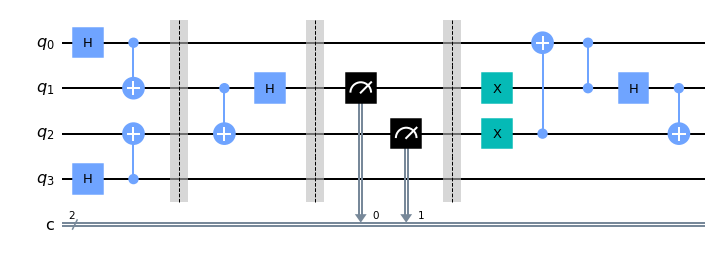

In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer
from qiskit.quantum_info import Statevector, partial_trace, purity
from qiskit.visualization import plot_state_qsphere
backend = Aer.get_backend('statevector_simulator')

cr=ClassicalRegister(2,'c')
qr=QuantumRegister(4,'q')
qc=QuantumCircuit(qr,cr)

# generate entanglment between 0 and 1
qc.h(0)
qc.cx(0,1)

# generate entanglment between 2 and 3
qc.h(3)
qc.cx(3,2)

qc.barrier()

# Bell measurement of 1 and 2
qc.cx(1,2)
qc.h(1)
qc.barrier()
qc.measure([1,2],[0,1])
qc.barrier()

# Post measurement actions

qc.x([1,2])
qc.cx(2,0)
qc.cz(1,0)

# Restore the Charlies' Bell state
qc.h(1)
qc.cx(1,2)
qc.draw('mpl')

In [2]:
# Get the full state vector
result=backend.run(qc).result()
psi = result.get_statevector()


First the state Charlie obtained by the Bell measurement.  There are four possibilities with the equal probability.  One of them is chosen at random.  Hence, the following output changes from run to run.  Try several times and see it changes.

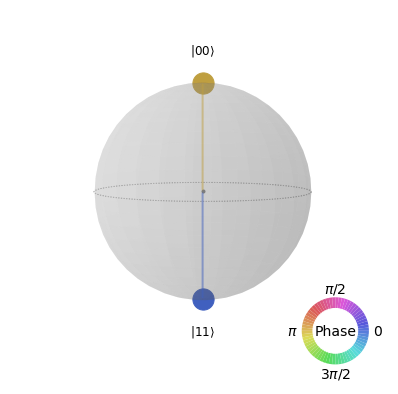

In [3]:
# Charlie's qubits
# Get the reduced density for qubait 1 and 2
rho12 = partial_trace(psi, [0,3])
plot_state_qsphere(rho12)

Next, the composite state of Alice's and Bob's qubits is shown.  Despite that the Charlie's state changes at random.  The state of Alice-Bob qubits always the same and that is their desired state $\frac{1}{\sqrt{2}}\left|01\rangle+|10\rangle\right)$.

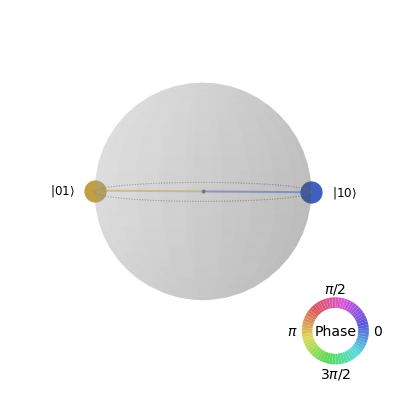

In [4]:
# Joint state of Alice's and Bob's qubits.
# Get the reduced density for qubait 0 and 3
rho23 = partial_trace(psi, [1,2])
# Plot the density
plot_state_qsphere(rho23)